In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [2]:
# Load the dataset
data = pd.read_csv('data_after_labelencoding.xls')

data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,Master,71948.0,0.0,RENT,23093.125,PERSONAL,16.02,0.37,3.0,561.0,0,1
1,21.0,0,High School,12282.0,0.0,OWN,1000.000,EDUCATION,11.14,0.08,2.0,504.0,1,0
2,25.0,0,High School,12438.0,3.0,MORTGAGE,5500.000,MEDICAL,12.87,0.37,3.0,635.0,0,1
3,23.0,0,Bachelor,79753.0,0.0,RENT,23093.125,MEDICAL,15.23,0.37,2.0,675.0,0,1
4,24.0,1,Master,66135.0,1.0,RENT,23093.125,MEDICAL,14.27,0.37,4.0,586.0,0,1


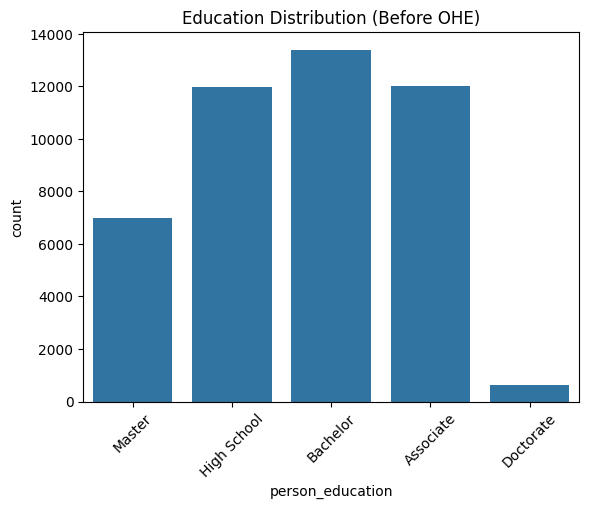

In [3]:

import matplotlib.pyplot as plt

# 1. Education distribution
sns.countplot(x="person_education", data=data)
plt.title("Education Distribution (Before OHE)")
plt.xticks(rotation=45)
plt.show()

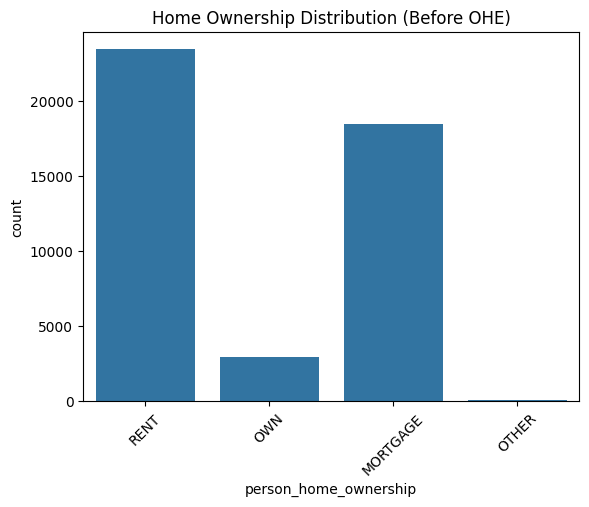

In [4]:

# 2. Home ownership distribution
sns.countplot(x="person_home_ownership", data=data)
plt.title("Home Ownership Distribution (Before OHE)")
plt.xticks(rotation=45)
plt.show()

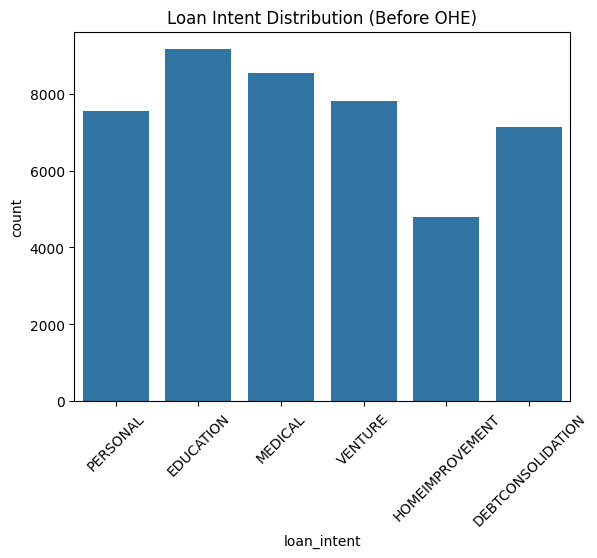

In [6]:

# 3. Loan intent distribution
sns.countplot(x="loan_intent", data=data)
plt.title("Loan Intent Distribution (Before OHE)")
plt.xticks(rotation=45)
plt.show()

## ONE HOT ENCODING

In [7]:
data['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [8]:
categorical_cols = ['person_education', 'person_home_ownership', 'loan_intent']

from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
ohtransform = oh.fit_transform(data[categorical_cols])

In [9]:
ohtransform

,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
44996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
44997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
44998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
data = pd.concat([data, ohtransform], axis=1).drop(columns = ['person_education', 'person_home_ownership', 'loan_intent'])

In [11]:
data

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,71948.0,0.0,23093.125,16.02,0.37,3.0,561.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.0,0,12282.0,0.0,1000.000,11.14,0.08,2.0,504.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25.0,0,12438.0,3.0,5500.000,12.87,0.37,3.0,635.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,0,79753.0,0.0,23093.125,15.23,0.37,2.0,675.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,1,66135.0,1.0,23093.125,14.27,0.37,4.0,586.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,47971.0,6.0,15000.000,15.66,0.31,3.0,645.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
44996,37.0,0,65800.0,17.0,9000.000,14.07,0.14,11.0,621.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
44997,33.0,1,56942.0,7.0,2771.000,10.02,0.05,10.0,668.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
44998,29.0,1,33164.0,4.0,12000.000,13.23,0.36,6.0,604.0,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
data.to_csv('data_after_onehot.csv', index=False) 
print("Saved: data_after_onehot.csv")

Saved: data_after_onehot.csv


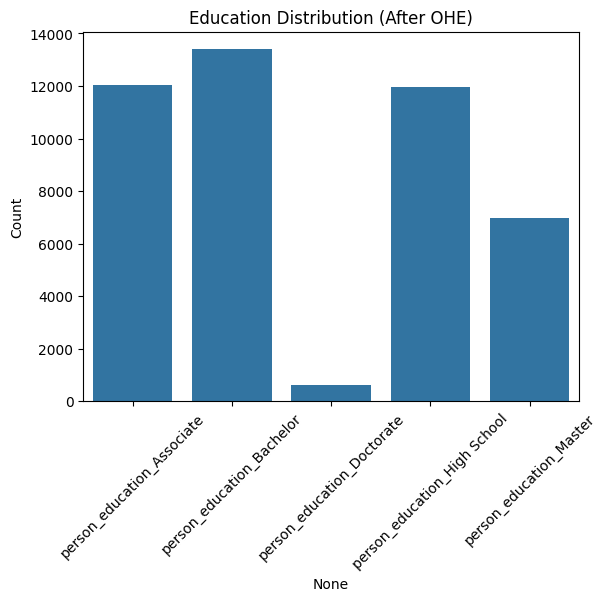

In [17]:
# 1. Education distribution after OHE
edu_cols = [col for col in data.columns if col.startswith("person_education_")]
sns.barplot(x=data[edu_cols].sum().index,
            y=data[edu_cols].sum().values)
plt.title("Education Distribution (After OHE)")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

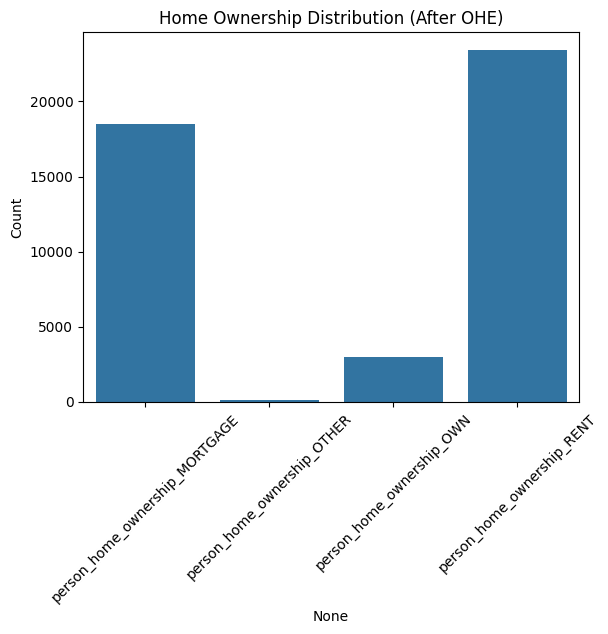

In [19]:
# 2. Home ownership distribution after OHE
home_cols = [col for col in data.columns if col.startswith("person_home_ownership_")]
sns.barplot(x=data[home_cols].sum().index,
            y=data[home_cols].sum().values)
plt.title("Home Ownership Distribution (After OHE)")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

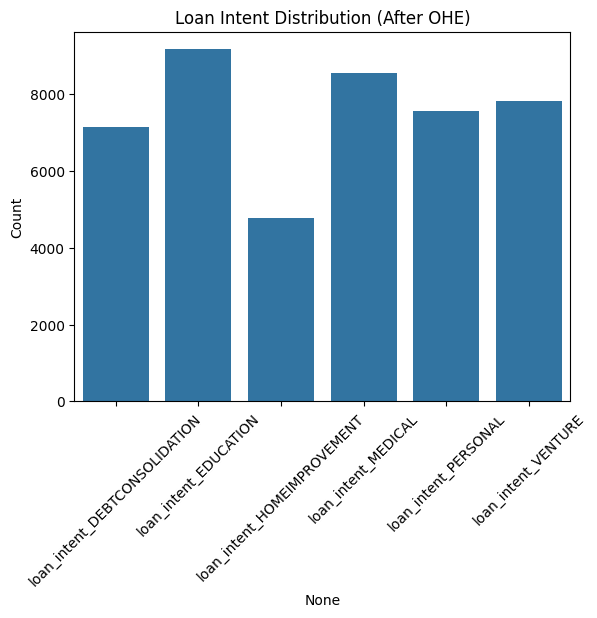

In [20]:
# 3. Loan intent distribution after OHE
loan_cols = [col for col in data.columns if col.startswith("loan_intent_")]
sns.barplot(x=data[loan_cols].sum().index,
            y=data[loan_cols].sum().values)
plt.title("Loan Intent Distribution (After OHE)")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()